# **Analysis of Data Scraped from Zameen.com**

**Bussiness Question:** What drives property prices in Pakistan?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adress = "/content/Scraped_Zameen_Data.xlsx - Sheet1.csv"

In [3]:
import pandas as pd
import numpy as np

# Define our three categories of columns
core_cols = ['City', 'Location', 'Area', 'Price', 'Type', 'Purpose', 'Bedrooms', 'Bathrooms']
structural_cols = ['Built in year', 'Floors', 'Kitchens', 'Servant Quarters', 'Electricity Backup', 'Lawn or Garden']

# These are the columns we will compress into a 'Luxury Score'
luxury_indicators = [
    'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
    'Furnished', 'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms',
    'Steam Room', 'Lounge or Sitting Room', 'Laundry Room', 'Broadband Internet Access',
    'Satellite or Cable TV Ready', 'Intercom', 'Community Swimming Pool', 'Community Gym',
    'Barbeque Area', 'Sauna', 'Nearby Schools', 'Nearby Hospitals', 'Nearby Shopping Malls',
    'Nearby Restaurants', 'Nearby Public Transport Service'
]

# Load only these columns
all_cols = core_cols + structural_cols + luxury_indicators
df = pd.read_csv(adress, usecols=all_cols)

print(f"Initial Dataset Shape: {df.shape}")

Initial Dataset Shape: (18255, 37)


In [4]:

df_final = df.copy()

# Convert NaN to 1/0 for all luxury indicator columns
for col in luxury_indicators:
    df_final[col] = df_final[col].map({'Yes': 1, 'NaN': 0}).fillna(0).astype(int)

# Create the 'Luxury_Score' column by summing across the row for these specific columns
df_final['Luxury_Score'] = df_final[luxury_indicators].sum(axis=1)

print(df_final['Luxury_Score'].describe())

count    18255.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Luxury_Score, dtype: float64


In [5]:
# Drop the original luxury indicator columns
df_final = df_final.drop(columns=luxury_indicators)

# Convert 'Yes'/'No' for Electricity Backup too
if 'Electricity Backup' in df_final.columns:
    df_final['Electricity Backup'] = df_final['Electricity Backup'].map({'Yes': 1, 'NaN': 0}).fillna(0)

# Save this version. This is the file we will use for cleaning and analysis next.
df_final.to_csv('zameen_refined_data.csv', index=False)

print("\n--- Final Dataset Columns ---")
print(df_final.columns.tolist())
print(f"\nNew Dataset Shape: {df_final.shape}")
df_final.head()


--- Final Dataset Columns ---
['City', 'Type', 'Area', 'Price', 'Purpose', 'Location', 'Built in year', 'Electricity Backup', 'Floors', 'Bedrooms', 'Bathrooms', 'Servant Quarters', 'Kitchens', 'Lawn or Garden', 'Luxury_Score']

New Dataset Shape: (18255, 15)


,City,Type,Area,Price,Purpose,Location,Built in year,Electricity Backup,Floors,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Lawn or Garden,Luxury_Score
0,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,2,2,NaN,NaN,NaN,0
1,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,2,3,NaN,1.0,NaN,0
2,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,1,2,NaN,NaN,NaN,0
3,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",2.0,0.0,NaN,1,2,1.0,4.0,NaN,0
4,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,2,2,NaN,NaN,NaN,0


In [6]:
df_final.head(20)

,City,Type,Area,Price,Purpose,Location,Built in year,Electricity Backup,Floors,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Lawn or Garden,Luxury_Score
0,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,2,2,NaN,NaN,NaN,0
1,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,2,3,NaN,1.0,NaN,0
2,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,1,2,NaN,NaN,NaN,0
3,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",2.0,0.0,NaN,1,2,1.0,4.0,NaN,0
4,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",NaN,0.0,NaN,2,2,NaN,NaN,NaN,0
5,Karachi,Flat,217 Sq. Yd.,PKR\n2.6 Crore,For Sale,"Jinnah Avenue, Karachi, Sindh",2024.0,0.0,NaN,3,3,1.0,2.0,NaN,0
6,Karachi,House,240 Sq. Yd.,PKR\n6.75 Crore,For Sale,"Gulistan-e-Jauhar, Karachi, Sindh",2008.0,0.0,NaN,9,6,NaN,3.0,NaN,0
7,Karachi,House,200 Sq. Yd.,PKR\n1.68 Crore,For Sale,"Bahria Town Karachi, Karachi, Sindh",NaN,0.0,NaN,3,3,NaN,NaN,NaN,0
8,Karachi,House,300 Sq. Yd.,PKR\n8 Crore,For Sale,"Gulistan-e-Jauhar, Karachi, Sindh",2025.0,0.0,NaN,6,6,NaN,2.0,NaN,0
9,Karachi,Flat,189 Sq. Yd.,PKR\n4.4 Crore,For Sale,"DHA Defence, Karachi, Sindh",2025.0,0.0,NaN,3,3,1.0,1.0,NaN,0


In [7]:
# Check how many duplicates exist before cleaning
initial_count = len(df_final)
print(f"Initial number of rows: {initial_count}")
duplicates = df_final.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# Drop the duplicates
df_final.drop_duplicates(inplace=True)

# Verify the new count
print(f"Rows remaining after dropping duplicates: {len(df_final)}")

Initial number of rows: 18255
Number of duplicate rows found: 1048
Rows remaining after dropping duplicates: 17207


In [8]:
blank_rows = df_final.isnull().all(axis=1).sum()
print(f"Number of blank rows: {blank_rows}")

Number of blank rows: 0


In [9]:
df_final.dropna(subset=['Price', 'Area'], inplace=True)

In [10]:
# Show count of missing values for each column
missing_report = df_final.isnull().sum()
print("--- Missing Values Per Column ---")
print(missing_report[missing_report > 0])

--- Missing Values Per Column ---
Built in year        5753
Floors               9272
Servant Quarters     7983
Kitchens             4552
Lawn or Garden      17199
dtype: int64


In [11]:
df_final.drop(columns=['Built in year'], inplace=True)

In [12]:
df_final = df_final.fillna(0)

In [13]:
df_final.head()

,City,Type,Area,Price,Purpose,Location,Electricity Backup,Floors,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Lawn or Garden,Luxury_Score
0,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,2,0.0,0.0,0.0,0
1,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,3,0.0,1.0,0.0,0
2,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,1,2,0.0,0.0,0.0,0
3,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,1,2,1.0,4.0,0.0,0
4,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,2,0.0,0.0,0.0,0


In [14]:
def clean_price(price):
    if pd.isna(price):
        return 0

    price = str(price).lower()

    multiplier = 1

    if 'crore' in price:
        multiplier = 10000000
    elif 'lakh' in price:
        multiplier = 100000
    elif 'million' in price:
        multiplier = 1000000

    numaric_part = ''.join(c for c in price if c.isdigit() or c == '.')

    try:
        return float(numaric_part) * multiplier
    except ValueError:
        return 0


In [15]:
# Apply the function
df_final['Price'] = df_final['Price'].apply(clean_price)

In [16]:
df_final.head()

,City,Type,Area,Price,Purpose,Location,Electricity Backup,Floors,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Lawn or Garden,Luxury_Score
0,Karachi,Flat,128 Sq. Yd.,47500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,2,0.0,0.0,0.0,0
1,Karachi,Flat,161 Sq. Yd.,62500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,3,0.0,1.0,0.0,0
2,Karachi,Flat,111 Sq. Yd.,34500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,1,2,0.0,0.0,0.0,0
3,Karachi,Flat,106 Sq. Yd.,29800000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,1,2,1.0,4.0,0.0,0
4,Karachi,Flat,156 Sq. Yd.,46500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,2,0.0,0.0,0.0,0


In [17]:
def convert_to_sqft(area_str):
    area_str = str(area_str).lower()

    # Extract the number
    numeric_part = ''.join(c for c in area_str if c.isdigit())
    if not numeric_part:
        return 0
    val = float(numeric_part)

    # Multiply based on unit
    if 'kanal' in area_str:
        return val * 4500
    elif 'marla' in area_str:
        return val * 225
    elif 'sq. yd.' in area_str or 'square yard' in area_str:
        return val * 9
    else:
        return val # Assume it's already sqft if no unit mentioned


In [18]:
df_final['Area_Sqft'] = df_final['Area'].apply(convert_to_sqft)

In [19]:
df_final.head()

,City,Type,Area,Price,Purpose,Location,Electricity Backup,Floors,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Lawn or Garden,Luxury_Score,Area_Sqft
0,Karachi,Flat,128 Sq. Yd.,47500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,2,0.0,0.0,0.0,0,1152.0
1,Karachi,Flat,161 Sq. Yd.,62500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,3,0.0,1.0,0.0,0,1449.0
2,Karachi,Flat,111 Sq. Yd.,34500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,1,2,0.0,0.0,0.0,0,999.0
3,Karachi,Flat,106 Sq. Yd.,29800000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,1,2,1.0,4.0,0.0,0,954.0
4,Karachi,Flat,156 Sq. Yd.,46500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,2,0.0,0.0,0.0,0,1404.0


In [20]:
df_final.dtypes

,0
City,object
Type,object
Area,object
Price,float64
Purpose,object
Location,object
Electricity Backup,float64
Floors,float64
Bedrooms,object
Bathrooms,object


In [21]:

mask = (df_final == '-').any(axis=1)

#Filter rows with -
rows_with_hyphen = df_final[mask]

print(f"Total rows containing at least one '-': {len(rows_with_hyphen)}")

rows_with_hyphen.head(10)

Total rows containing at least one '-': 1191


,City,Type,Area,Price,Purpose,Location,Electricity Backup,Floors,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Lawn or Garden,Luxury_Score,Area_Sqft
82,Karachi,House,"1,008 Sq. Yd.",145000000.0,For Sale,"Zamzama, Karachi, Sindh",0.0,2.0,-,-,2.0,2.0,0.0,0,9072.0
98,Karachi,Flat,200 Sq. Yd.,27500000.0,For Sale,"Gulistan-e-Jauhar, Karachi, Sindh",0.0,0.0,-,-,1.0,2.0,0.0,0,1800.0
119,Karachi,House,250 Sq. Yd.,60000000.0,For Sale,"Gulistan-e-Jauhar, Karachi, Sindh",0.0,0.0,-,-,0.0,0.0,0.0,0,2250.0
255,Karachi,House,120 Sq. Yd.,13000000.0,For Sale,"Korangi, Karachi, Sindh",0.0,0.0,-,-,0.0,0.0,0.0,0,1080.0
309,Karachi,Flat,182 Sq. Yd.,58000000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,2,-,1.0,2.0,0.0,0,1638.0
359,Karachi,House,"1,000 Sq. Yd.",210000000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,7,-,0.0,0.0,0.0,0,9000.0
415,Karachi,House,600 Sq. Yd.,65000000.0,For Sale,"Gadap Town, Karachi, Sindh",0.0,0.0,-,-,0.0,1.0,0.0,0,5400.0
555,Karachi,Penthouse,778 Sq. Yd.,140000000.0,For Sale,"Callachi Cooperative Housing Society, Karachi,...",0.0,0.0,-,-,0.0,0.0,0.0,0,7002.0
706,Karachi,House,600 Sq. Yd.,95000000.0,For Sale,"Federal B Area, Karachi, Sindh",0.0,0.0,-,-,0.0,0.0,0.0,0,5400.0
753,Karachi,Flat,94 Sq. Yd.,34500000.0,For Sale,"DHA Defence, Karachi, Sindh",0.0,0.0,-,1,1.0,1.0,0.0,0,846.0


In [22]:
import numpy as np
from sklearn.impute import KNNImputer

#Convert '-' to NaN
df_final['Bedrooms'] = pd.to_numeric(df_final['Bedrooms'], errors='coerce')
df_final['Bathrooms'] = pd.to_numeric(df_final['Bathrooms'], errors='coerce')

df_final.loc[df_final['Type'].str.contains('Plot', case=False), ['Bedrooms', 'Bathrooms']] = 0

df_final['Bedrooms'] = df_final['Bedrooms'].fillna(
    df_final.groupby(['City', 'Type'])['Bedrooms'].transform('median')
)

 # KNN for the remaining ones
imputer = KNNImputer(n_neighbors=3)

numeric_cols = ['Price', 'Area_Sqft', 'Bedrooms', 'Bathrooms', 'Luxury_Score']
df_final[numeric_cols] = imputer.fit_transform(df_final[numeric_cols])

#Final Integer Conversion
df_final['Bedrooms'] = df_final['Bedrooms'].round().astype(int)
df_final['Bathrooms'] = df_final['Bathrooms'].round().astype(int)

print("Hybrid Imputation Complete!")

Hybrid Imputation Complete!


In [23]:
df_final = df_final.astype({'Floors': int, 'Kitchens': int, 'Servant Quarters': int, 'Lawn or Garden': int, 'Electricity Backup': int, 'Bedrooms':int, 'Bathrooms':int})

In [24]:
df_final.dtypes

,0
City,object
Type,object
Area,object
Price,float64
Purpose,object
Location,object
Electricity Backup,int64
Floors,int64
Bedrooms,int64
Bathrooms,int64


In [26]:
df_clean = df_final.copy()

cols_to_fix = ['Price', 'Area_Sqft']

for col in cols_to_fix:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only the rows that fall within these boundaries
    df_clean = df_clean[(df_clean[col] >= lower_limit) & (df_clean[col] <= upper_limit)]

print(f"Cleanup finished!")
print(f"Removed {len(df_final) - len(df_clean)} extreme outlier rows.")

Cleanup finished!
Removed 2681 extreme outlier rows.


/tmp/ipython-input-3600473068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='City', y='Price', palette='mako')


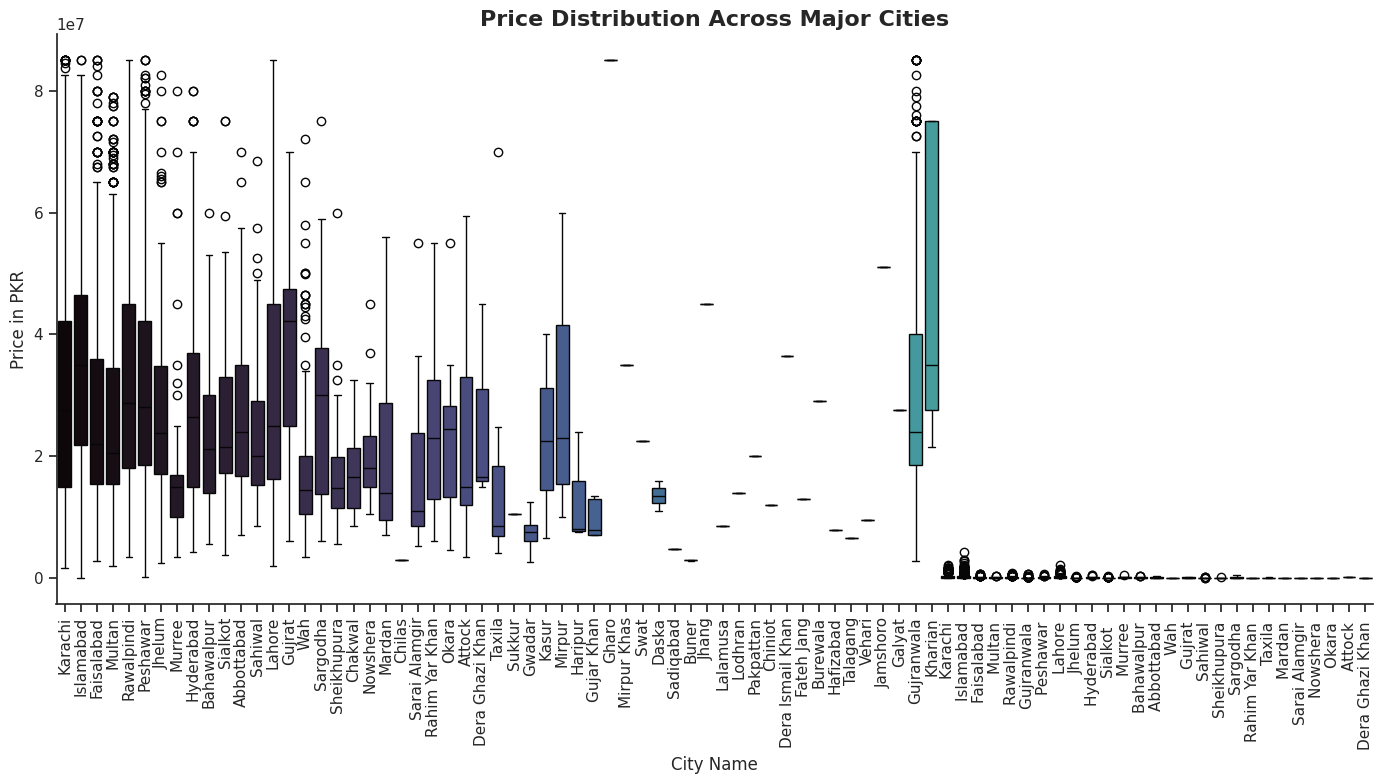

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

plt.figure(figsize=(14, 8))

sns.boxplot(data=df_clean, x='City', y='Price', palette='mako')

plt.title('Price Distribution Across Major Cities', fontsize=16, fontweight='bold')
plt.xlabel('City Name', fontsize=12)
plt.ylabel('Price in PKR', fontsize=12)

plt.xticks(rotation=90)

sns.despine()

plt.tight_layout()
plt.show()

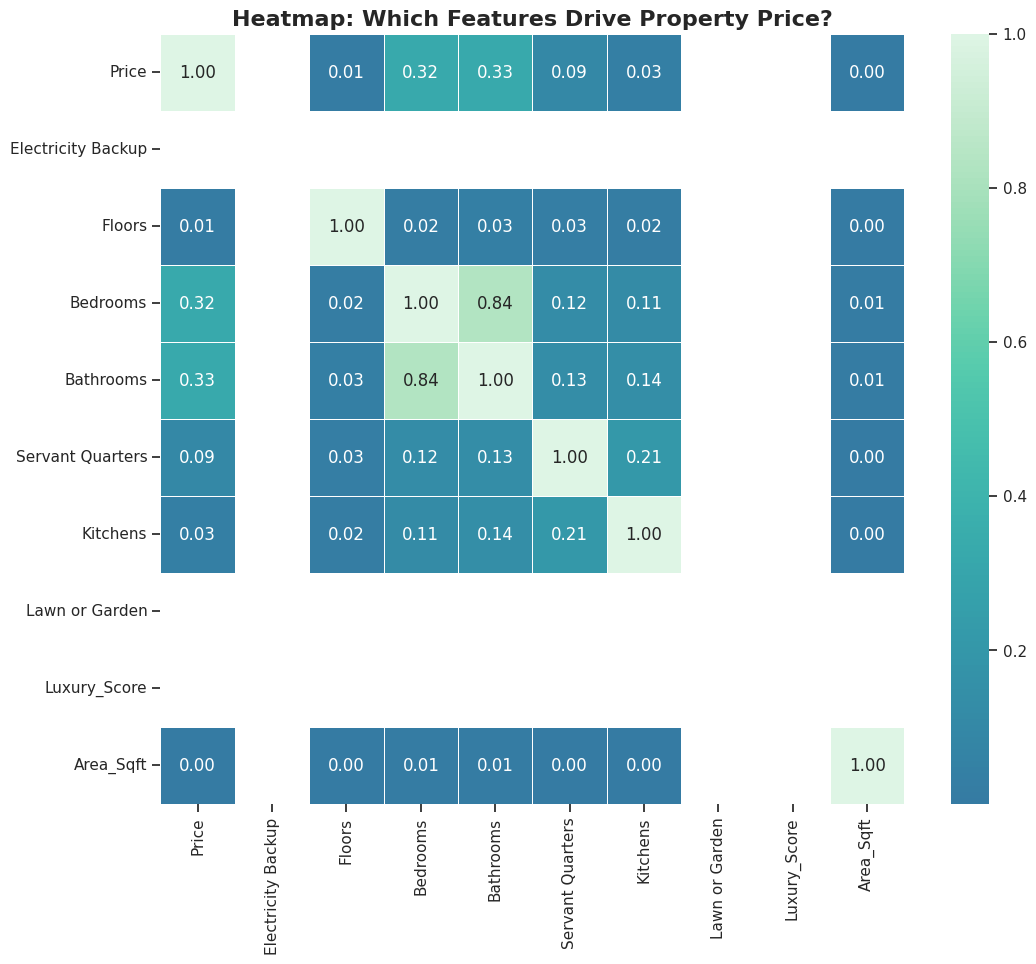

--- Correlation with Price (Sorted) ---
Price                 1.000000
Bathrooms             0.325879
Bedrooms              0.323972
Servant Quarters      0.094364
Kitchens              0.033983
Floors                0.011451
Area_Sqft             0.000275
Electricity Backup         NaN
Lawn or Garden             NaN
Luxury_Score               NaN
Name: Price, dtype: float64


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df_final.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='mako', center=0, linewidths=0.5, fmt='.2f')

plt.title('Heatmap: Which Features Drive Property Price?', fontsize=16, fontweight='bold')
plt.show()

# 4. Print the Price Column specifically for easy reading
print("--- Correlation with Price (Sorted) ---")
print(corr_matrix['Price'].sort_values(ascending=False))

/tmp/ipython-input-661225399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bedrooms', y='Price', data=df_final, palette='Blues_d')


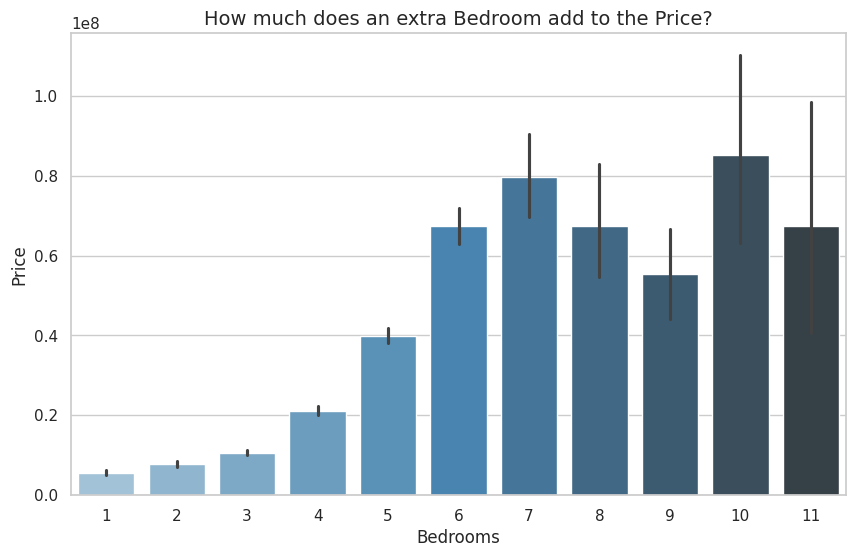

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# See the average price per bedroom count
sns.barplot(x='Bedrooms', y='Price', data=df_final, palette='Blues_d')
plt.title('How much does an extra Bedroom add to the Price?', fontsize=14)
plt.show()

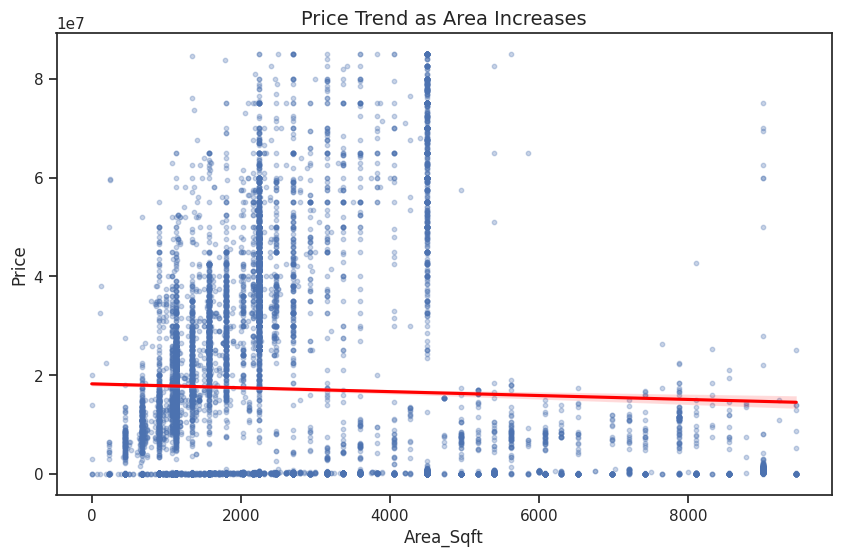

In [31]:
plt.figure(figsize=(10, 6))
# 'scatter_kws' makes the dots smaller so the trend line is visible
sns.regplot(x='Area_Sqft', y='Price', data=df_clean,
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title('Price Trend as Area Increases', fontsize=14)
plt.show()

/tmp/ipython-input-1695870780.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Bedrooms', y='Price', data=df_final, palette='Blues_d')
/tmp/ipython-input-1695870780.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Bathrooms', y='Price', data=df_final, palette='Greens_d')
/tmp/ipython-input-1695870780.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x='Area_Group', y='Price', data=df_final, palette='Purples_d')
/tmp/ipython-input-1695870780.py:24: FutureWarning: 

Passing `palette

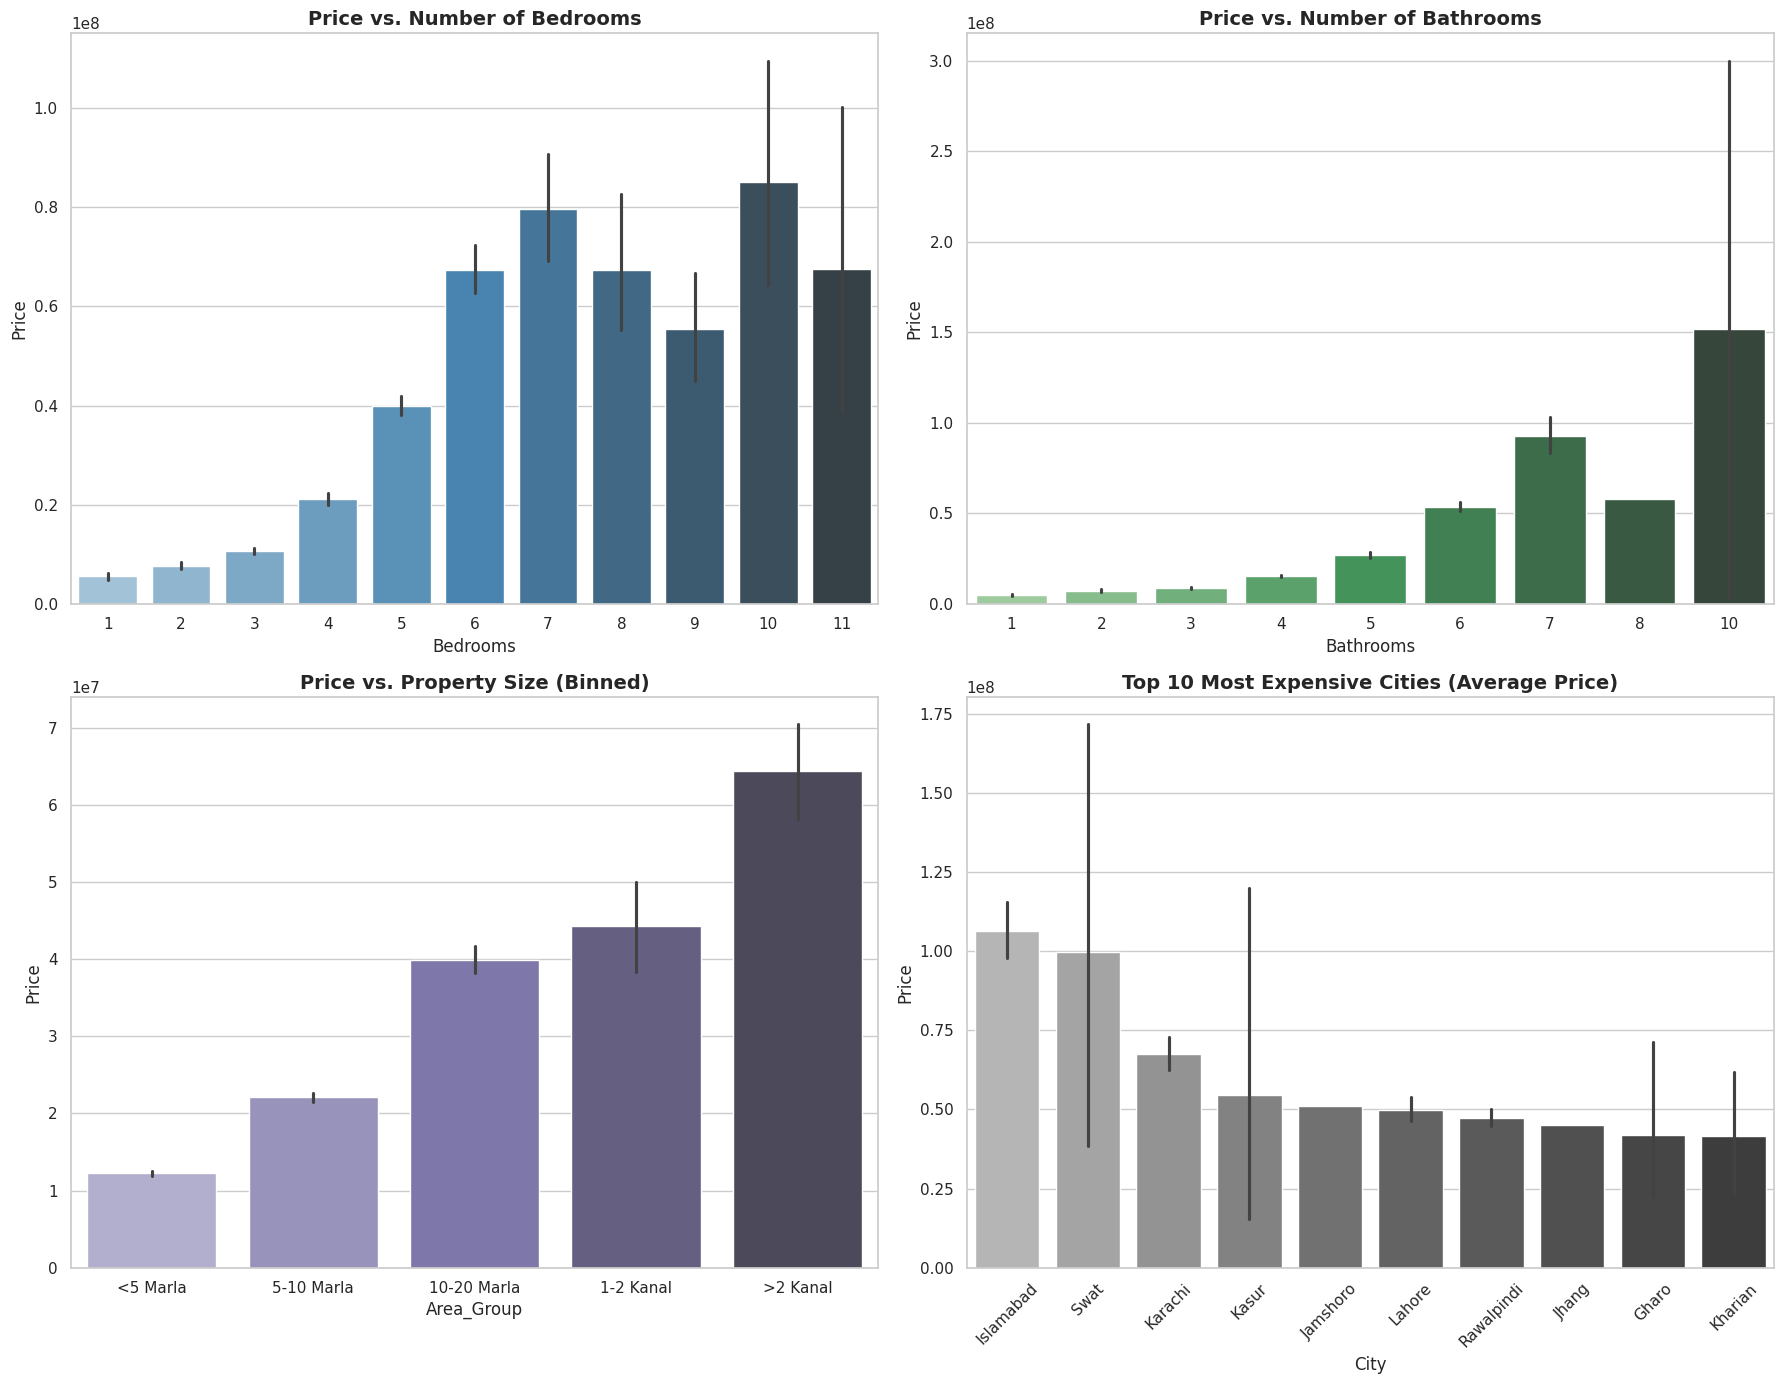

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


bins = [0, 1125, 2250, 4500, 9000, np.inf]
labels = ['<5 Marla', '5-10 Marla', '10-20 Marla', '1-2 Kanal', '>2 Kanal']
df_final['Area_Group'] = pd.cut(df_final['Area_Sqft'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_theme(style="whitegrid")

sns.barplot(ax=axes[0, 0], x='Bedrooms', y='Price', data=df_final, palette='Blues_d')
axes[0, 0].set_title('Price vs. Number of Bedrooms', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[0, 1], x='Bathrooms', y='Price', data=df_final, palette='Greens_d')
axes[0, 1].set_title('Price vs. Number of Bathrooms', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[1, 0], x='Area_Group', y='Price', data=df_final, palette='Purples_d')
axes[1, 0].set_title('Price vs. Property Size (Binned)', fontsize=14, fontweight='bold')

city_order = df_final.groupby('City')['Price'].mean().sort_values(ascending=False).index[:10]
sns.barplot(ax=axes[1, 1], x='City', y='Price', data=df_final, order=city_order, palette='Greys_d')
axes[1, 1].set_title('Top 10 Most Expensive Cities (Average Price)', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1968992205.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 1], x='City', y='Price', data=df_final, order=city_rank, palette='Blues_d')


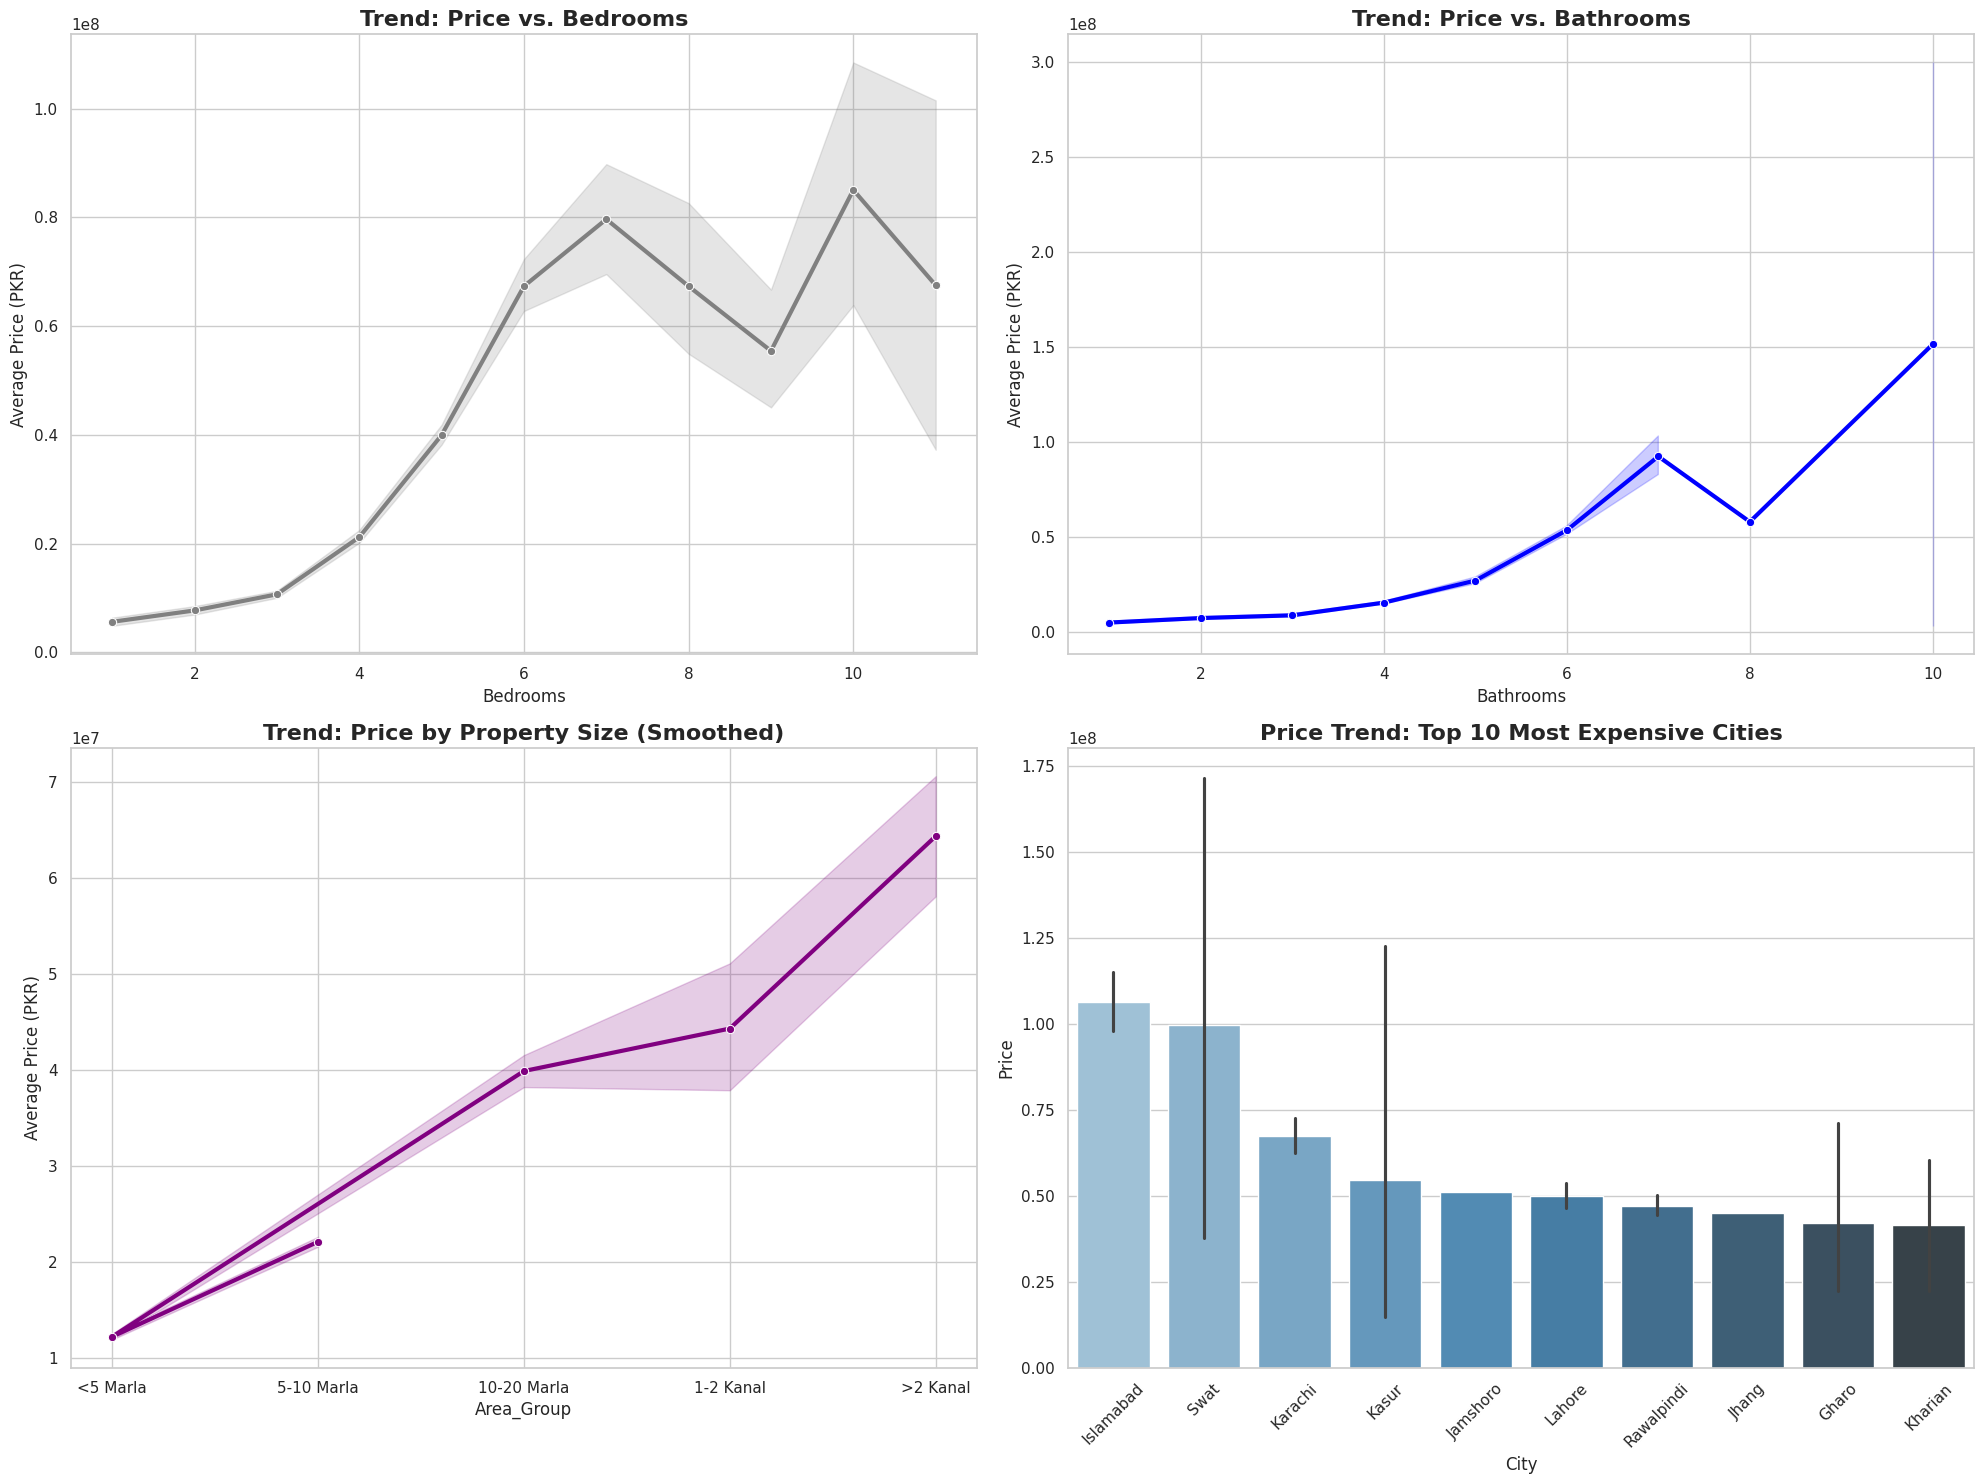

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bins = [0, 1125, 2250, 4500, 9000, np.inf]
labels = ['<5 Marla', '5-10 Marla', '10-20 Marla', '1-2 Kanal', '>2 Kanal']
df_final['Area_Group'] = pd.cut(df_final['Area_Sqft'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.set_style("whitegrid")

sns.lineplot(ax=axes[0, 0], x='Bedrooms', y='Price', data=df_final, marker='o', color='Grey', linewidth=3)
axes[0, 0].set_title('Trend: Price vs. Bedrooms', fontsize=16, fontweight='bold')
axes[0, 0].set_ylabel('Average Price (PKR)')

sns.lineplot(ax=axes[0, 1], x='Bathrooms', y='Price', data=df_final, marker='o', color='Blue', linewidth=3)
axes[0, 1].set_title('Trend: Price vs. Bathrooms', fontsize=16, fontweight='bold')
axes[0, 1].set_ylabel('Average Price (PKR)')

sns.lineplot(ax=axes[1, 0], x='Area_Group', y='Price', data=df_final, marker='o', color='Purple', linewidth=3, sort=False)
axes[1, 0].set_title('Trend: Price by Property Size (Smoothed)', fontsize=16, fontweight='bold')
axes[1, 0].set_ylabel('Average Price (PKR)')

city_rank = df_final.groupby('City')['Price'].mean().sort_values(ascending=False).head(10).index
sns.barplot(ax=axes[1, 1], x='City', y='Price', data=df_final, order=city_rank, palette='Blues_d')
axes[1, 1].set_title('Price Trend: Top 10 Most Expensive Cities', fontsize=16, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()